In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir("/Users/shree/Desktop/MLP/Regression")

In [4]:
os.listdir()

['Untitled.ipynb',
 'district wise rainfall normal.csv',
 '.ipynb_checkpoints',
 'ANNUAL RAINFALL REGRESSION.ipynb']

In [5]:
A=pd.read_csv("district wise rainfall normal.csv")

In [6]:
A

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [7]:
A.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [8]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    object 
 1   DISTRICT       641 non-null    object 
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  ANNUAL         641 non-null    float64
 15  Jan-Feb        641 non-null    float64
 16  Mar-May        641 non-null    float64
 17  Jun-Sep        641 non-null    float64
 18  Oct-Dec   

In [9]:
A.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.00000,641.000000
mean,18.355070,20.984399,30.034789,45.543214,81.535101,196.007332,326.033697,291.152262,194.609048,90.446334,34.117473,18.150858,1346.969579,39.339470,157.113105,1007.80234,142.714665
std,21.082806,27.729596,45.451082,71.556279,111.960390,196.556284,221.364643,152.647325,99.830540,74.990685,59.371274,32.711009,838.878874,47.212773,213.445888,629.33261,148.951752
min,0.000000,0.000000,0.000000,0.000000,0.900000,3.800000,11.600000,14.100000,8.600000,3.100000,1.200000,0.000000,94.600000,0.000000,1.500000,39.60000,5.600000
25%,6.900000,7.000000,7.000000,5.000000,12.100000,68.800000,206.400000,194.600000,128.800000,34.300000,6.600000,5.300000,830.400000,14.700000,27.800000,625.40000,51.600000
50%,13.300000,12.300000,12.700000,15.100000,33.900000,131.900000,293.700000,284.800000,181.300000,62.600000,12.900000,7.900000,1116.200000,27.700000,67.200000,896.60000,86.700000
75%,19.200000,24.100000,33.200000,48.300000,91.900000,226.600000,374.800000,358.100000,234.100000,130.200000,32.300000,14.900000,1530.900000,41.100000,172.400000,1193.80000,175.200000
max,144.500000,229.600000,367.900000,554.400000,733.700000,1476.200000,1820.900000,1522.100000,826.300000,517.700000,475.100000,297.700000,7229.300000,335.300000,1256.500000,5228.00000,1048.500000


In [10]:
A.shape

(641, 19)

In [11]:
A.columns

Index(['STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [12]:
A.dtypes

STATE_UT_NAME     object
DISTRICT          object
JAN              float64
FEB              float64
MAR              float64
APR              float64
MAY              float64
JUN              float64
JUL              float64
AUG              float64
SEP              float64
OCT              float64
NOV              float64
DEC              float64
ANNUAL           float64
Jan-Feb          float64
Mar-May          float64
Jun-Sep          float64
Oct-Dec          float64
dtype: object

In [13]:
A.columns

Index(['STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [14]:
A['DISTRICT'].unique()

array(['NICOBAR', 'SOUTH ANDAMAN', 'N & M ANDAMAN', 'LOHIT', 'EAST SIANG',
       'SUBANSIRI F.D', 'TIRAP', 'ANJAW (LOHIT)', 'LOWER DIBANG',
       'CHANGLANG', 'PAPUM PARE', 'LOW SUBANSIRI', 'UPPER SIANG',
       'WEST SIANG', 'DIBANG VALLEY', 'WEST KAMENG', 'EAST KAMENG',
       'TAWANG(W KAME', 'KURUNG KUMEY', 'CACHAR', 'DARRANG', 'GOALPARA',
       'KAMRUP', 'LAKHIMPUR', 'NORTH CACHAR', 'NAGAON', 'SIVASAGAR',
       'BARPETA', 'DHUBRI', 'DIBRUGARH', 'JORHAT', 'KARIMGANJ',
       'KOKRAJHAR', 'SHONITPUR', 'GOLAGHAT', 'TINSUKIA', 'HAILAKANDI',
       'DHEMAJI(LAKHI', 'KARBI ANGLONG', 'UDALGURI(DARA', 'KAMRUP METROP',
       'CHIRANG(BONGAI', 'BAKSA BARPETA', 'BONGAIGAON', 'MORIGAON',
       'NALBARI', 'EAST KHASI HI', 'JAINTIA HILLS', 'EAST GARO HIL',
       'RI-BHOI', 'SOUTH GARO HI', 'W KHASI HILL', 'WEST GARO HIL',
       'IMPHAL EAST', 'SENAPATI', 'TAMENGLONG', 'CHANDEL', 'UKHRUL',
       'THOUBAL', 'BISHNUPUR', 'IMPHAL WEST', 'CHURACHANDPUR', 'AIZAWL',
       'CHAMPHAI', 'KOLASI

In [15]:
A['STATE_UT_NAME'].unique()

array(['ANDAMAN And NICOBAR ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA',
       'WEST BENGAL', 'SIKKIM', 'ORISSA', 'JHARKHAND', 'BIHAR',
       'UTTAR PRADESH', 'UTTARANCHAL', 'HARYANA', 'CHANDIGARH', 'DELHI',
       'PUNJAB', 'HIMACHAL', 'JAMMU AND KASHMIR', 'RAJASTHAN',
       'MADHYA PRADESH', 'GUJARAT', 'DADAR NAGAR HAVELI', 'DAMAN AND DUI',
       'MAHARASHTRA', 'GOA', 'CHATISGARH', 'ANDHRA PRADESH', 'TAMIL NADU',
       'PONDICHERRY', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [16]:
A['STATE_UT_NAME'].nunique()

35

In [17]:
A['DISTRICT'].nunique()

637

In [18]:
A['STATE_UT_NAME'].count()

641

In [19]:
A['DISTRICT'].count()

641

In [20]:
A["STATE_UT_NAME"] =A["STATE_UT_NAME"].astype('category')
A["DISTRICT"] = A["DISTRICT"].astype('category')

In [21]:
A.dtypes

STATE_UT_NAME    category
DISTRICT         category
JAN               float64
FEB               float64
MAR               float64
APR               float64
MAY               float64
JUN               float64
JUL               float64
AUG               float64
SEP               float64
OCT               float64
NOV               float64
DEC               float64
ANNUAL            float64
Jan-Feb           float64
Mar-May           float64
Jun-Sep           float64
Oct-Dec           float64
dtype: object

In [22]:
A["STATE_UT_NAME"] =A["STATE_UT_NAME"].cat.codes
A["DISTRICT"] = A["DISTRICT"].cat.codes

In [23]:
A.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,423,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,0,553,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,0,396,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,2,347,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,2,173,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [24]:
A.tail()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
636,17,233,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,17,290,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,17,447,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,17,620,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5
640,18,341,20.8,14.7,11.8,48.9,171.7,330.2,287.7,217.5,163.1,157.1,117.7,58.8,1600.0,35.5,232.4,998.5,333.6


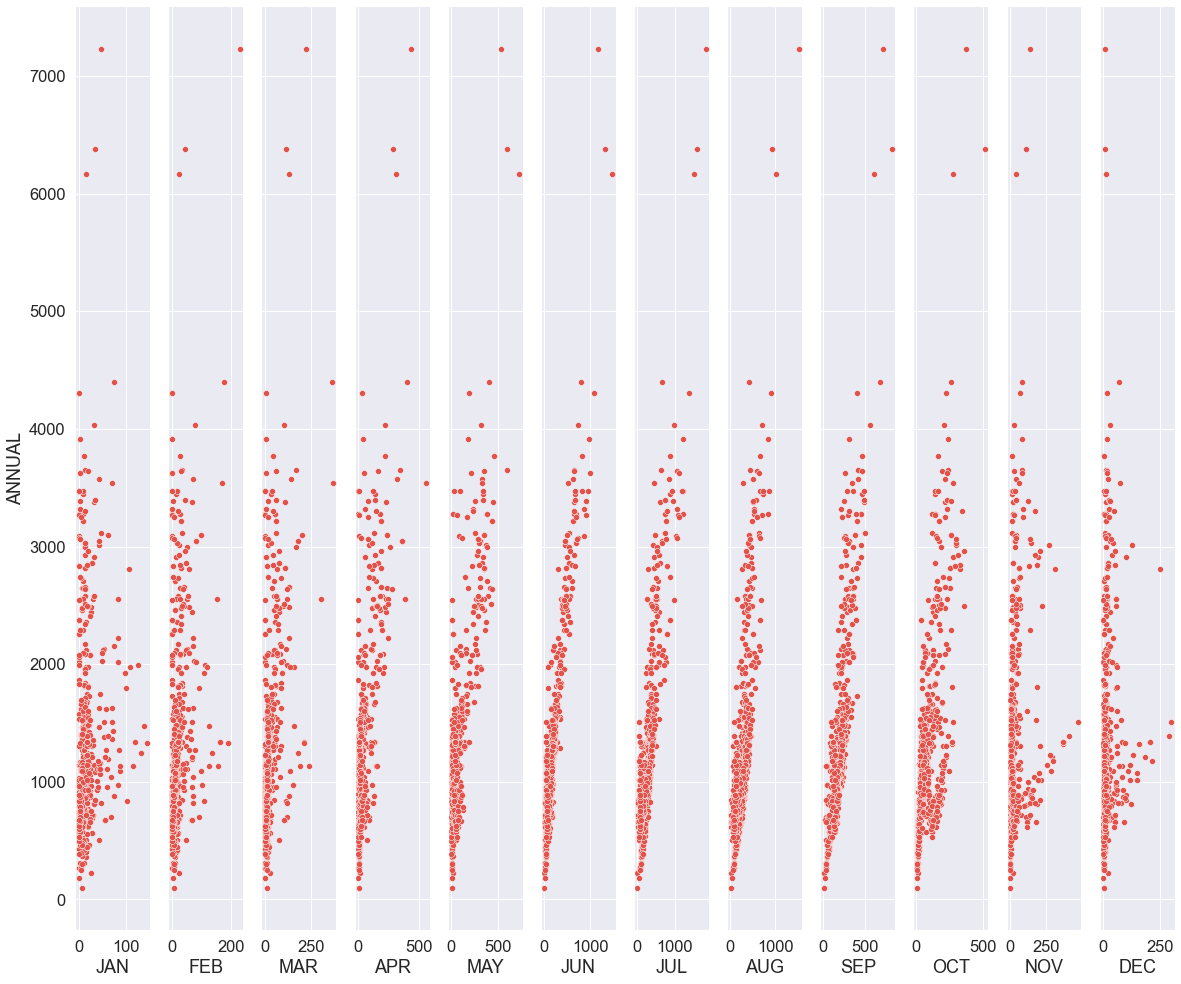

In [25]:
#y->Dependant variable, x->Independant variable
p = sns.pairplot(A, x_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], y_vars='ANNUAL', size=14, aspect=0.1)

In [26]:
#Fitting the linear model
x = A.drop(["ANNUAL"],axis=1)
y = A.ANNUAL

In [27]:
x.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,423,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,165.2,540.7,1207.2,892.1
1,0,553,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,69.7,483.5,1757.2,705.3
2,0,396,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,48.6,405.6,1884.4,574.7
3,2,347,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,123.0,841.3,1848.5,231.0
4,2,173,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,112.8,645.4,3008.4,268.1


In [28]:
y

0      2805.2
1      3015.7
2      2913.3
3      3043.8
4      4034.7
        ...  
636    3302.5
637    3621.6
638    2958.4
639    3253.1
640    1600.0
Name: ANNUAL, Length: 641, dtype: float64

In [29]:
x.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,423,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,165.2,540.7,1207.2,892.1
1,0,553,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,69.7,483.5,1757.2,705.3
2,0,396,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,48.6,405.6,1884.4,574.7
3,2,347,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,123.0,841.3,1848.5,231.0
4,2,173,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,112.8,645.4,3008.4,268.1


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  641 non-null    int8   
 1   DISTRICT       641 non-null    int16  
 2   JAN            641 non-null    float64
 3   FEB            641 non-null    float64
 4   MAR            641 non-null    float64
 5   APR            641 non-null    float64
 6   MAY            641 non-null    float64
 7   JUN            641 non-null    float64
 8   JUL            641 non-null    float64
 9   AUG            641 non-null    float64
 10  SEP            641 non-null    float64
 11  OCT            641 non-null    float64
 12  NOV            641 non-null    float64
 13  DEC            641 non-null    float64
 14  Jan-Feb        641 non-null    float64
 15  Mar-May        641 non-null    float64
 16  Jun-Sep        641 non-null    float64
 17  Oct-Dec        641 non-null    float64
dtypes: float64

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.sample(n=641),random_state = 0,test_size=0.25)

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [55]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.02298374522612645


In [73]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 8.242295734817162e-14


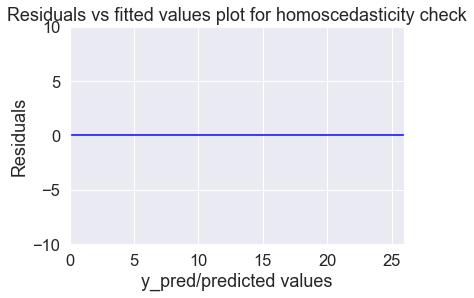

In [74]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Goldfeld Quandt Test

In [75]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.2953318207080144), ('p-value', 0.02617696086400063)]

In [76]:
from scipy.stats import bartlett
test = bartlett(X_train[0],residuals)
print(test)

BartlettResult(statistic=23275.40836014999, pvalue=0.0)


In [77]:
from scipy.stats import bartlett
test = bartlett(X_train[1],residuals)
print(test)

BartlettResult(statistic=24387.90183789968, pvalue=0.0)


In [78]:
from scipy.stats import bartlett
test = bartlett(X_train[2],residuals)
print(test)

BartlettResult(statistic=23785.63191236747, pvalue=0.0)


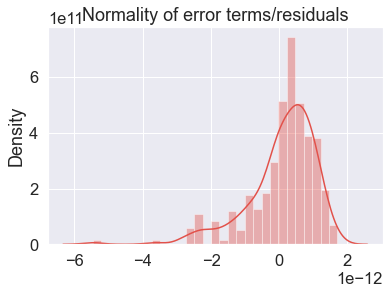

In [79]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

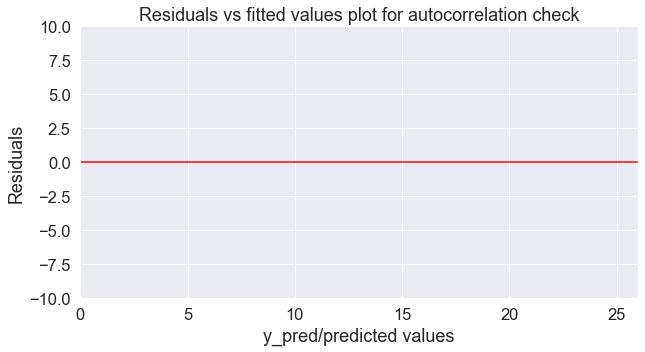

In [80]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [81]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.4086968260731838

In [82]:
import statsmodels.api as sm

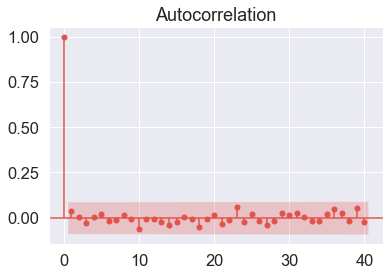

In [83]:
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

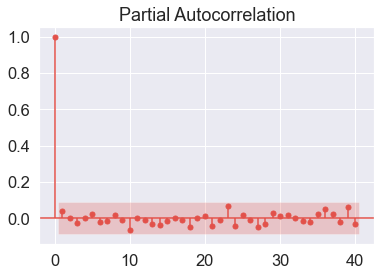

In [84]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

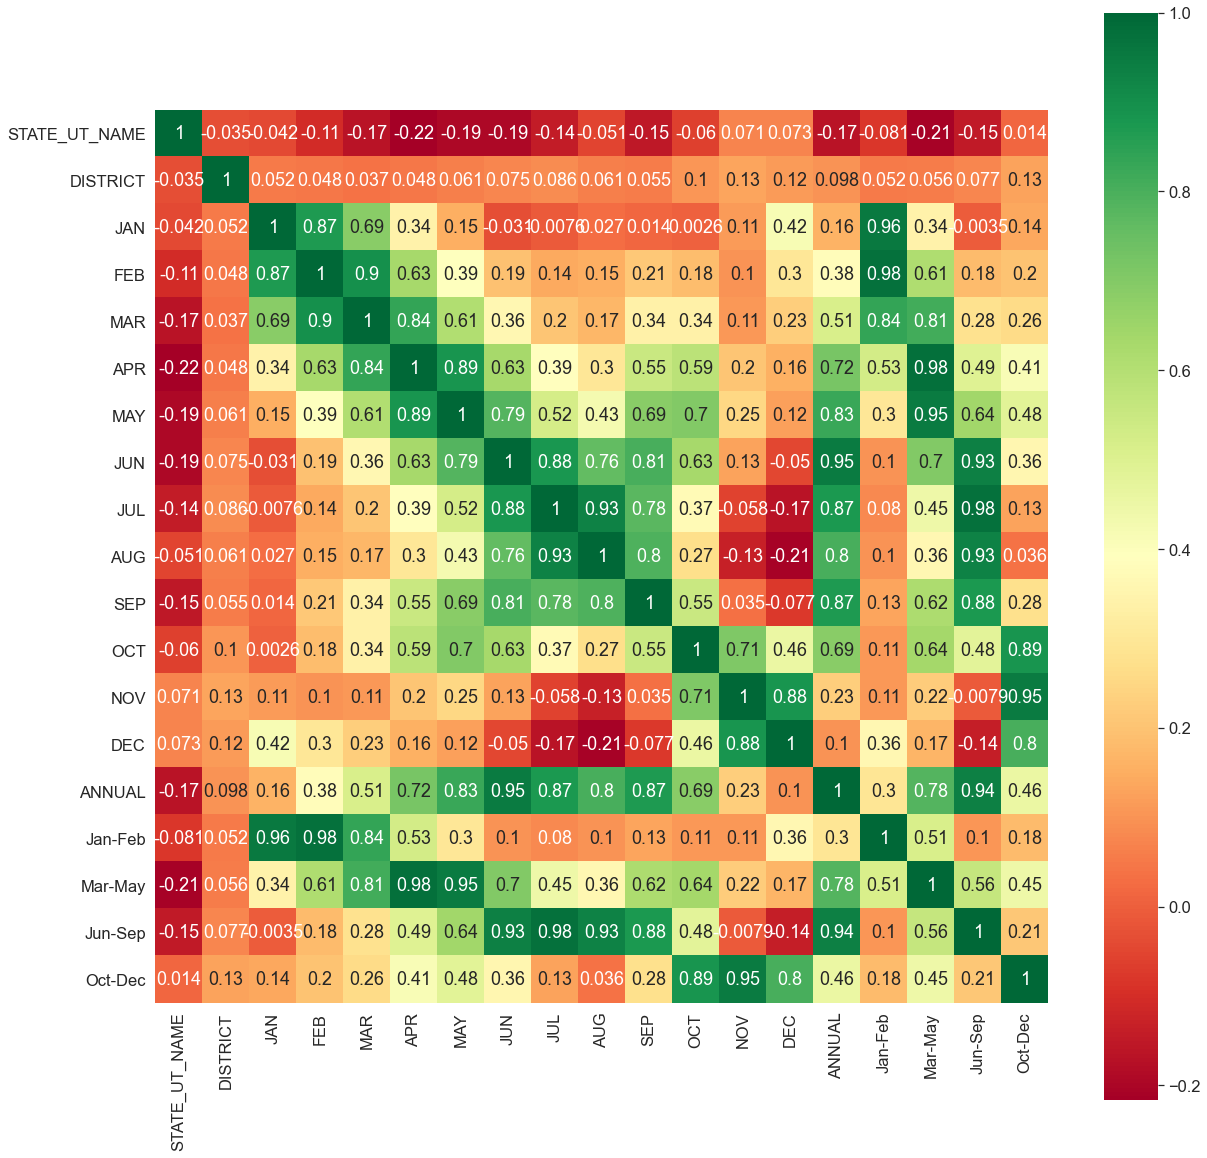

In [85]:
plt.figure(figsize=(20,20)) 
p=sns.heatmap(A.corr(), annot=True,cmap='RdYlGn',square=True) 

In [86]:

from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0


In [87]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9953703385112469
R squared: 0.9953703385112469


In [88]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train,y_train)
svr_y_pred = svr.predict(X_train)
print("Accuracy: {}".format(svr.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=svr_y_pred)))

Accuracy: -0.0018398221376005885
R squared: -0.0018398221376005885
